In [10]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [11]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(r"C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\", "Train", str(i))

    # Check if the folder exists
    if not os.path.exists(path):
        print(f"Folder {path} does not exist. Skipping class {i}.")
        continue  # Skip this iteration if folder does not exist as we have less classes for Finnish dataset

    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a}: {e}")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Folder C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\Train\6 does not exist. Skipping class 6.
Folder C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\Train\16 does not exist. Skipping class 16.
Folder C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\Train\24 does not exist. Skipping class 24.
Folder C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\Train\30 does not exist. Skipping class 30.
Folder C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\Train\32 does not exist. Skipping class 32.


In [12]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(19152, 30, 30, 3) (19152,)
(15321, 30, 30, 3) (3831, 30, 30, 3) (15321,) (3831,)


In [13]:
# Building the model
model = Sequential()

# Step 1: Conv2D filters
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Step 2: Dropout to prevent overfitting
model.add(Dropout(rate=0.25))

# Step 3: Fewer Conv2D layers but not oversimplified
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout to ensure regularization
model.add(Dropout(rate=0.25))

# Step 4: Flatten and reduce dense layer size
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

# Output layer with 43 classes
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model display
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 11, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,483 (326.11 KB)

 Trainable params: 83,483 (326.11 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1134 - loss: 4.5739 - val_accuracy: 0.7771 - val_loss: 1.0260
Epoch 2/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6353 - loss: 1.2037 - val_accuracy: 0.9541 - val_loss: 0.2272
Epoch 3/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8201 - loss: 0.5649 - val_accuracy: 0.9655 - val_loss: 0.1414
Epoch 4/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8836 - loss: 0.3685 - val_accuracy: 0.9867 - val_loss: 0.0870
Epoch 5/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9135 - loss: 0.2823 - val_accuracy: 0.9914 - val_loss: 0.0520
Epoch 6/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9303 - loss: 0.2275 - val_accuracy: 0.9969 - val_loss: 0.0290
Epoch 7/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9428 - loss: 0.1743 - val_accuracy: 0.9966 - val_loss: 0.0206
Epoch 8/15
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9497 - loss: 0.1693 - val_accuracy: 0.

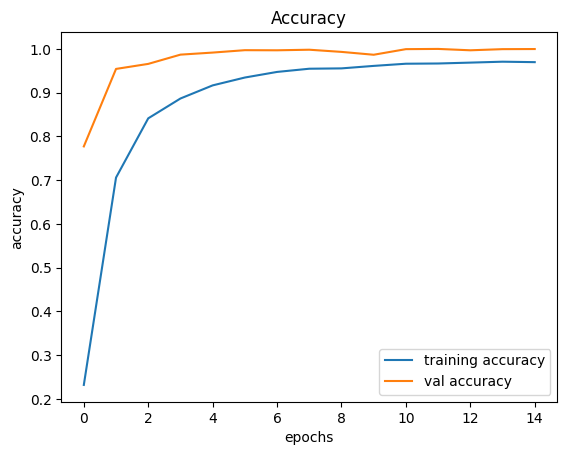

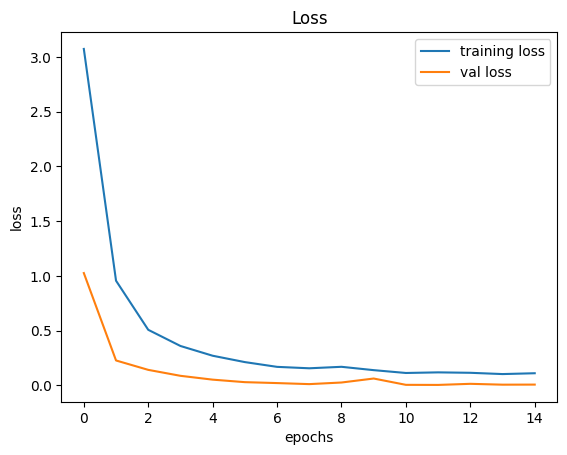

In [15]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv(r"C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open(r"C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\"+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

print(accuracy_score(labels, pred))

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.9990253411306043


In [17]:
# Saving the Model
model.save(r"C:\Users\ali\workspace\jamk_thesis\thesis_work\dataset\mika_shared_dataset\\traffic_classifier_2.h5")

In [18]:
# Mapping of Class IDs to Traffic Sign Names
class_labels = {
    0:  "Speed limit (20km/h)",
    1:  "Speed limit (30km/h)",
    2:  "Speed limit (50km/h)",
    3:  "Speed limit (60km/h)",
    4:  "Speed limit (70km/h)",
    5:  "Speed limit (80km/h)",
    6:  "End of speed limit (80km/h)",
    7:  "Speed limit (100km/h)",
    8:  "Speed limit (120km/h)",
    9:  "No overtaking",
    10: "No overtaking for vehicles over 3.5 tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and overtaking limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no overtaking",
    42: "End of no overtaking for vehicles over 3.5 tons"
}


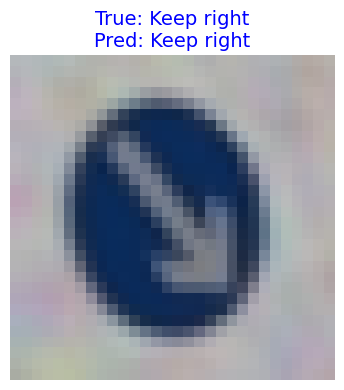

---------------------------------------------



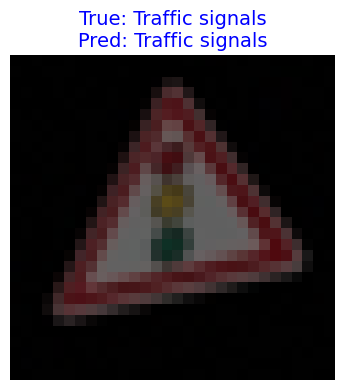

---------------------------------------------



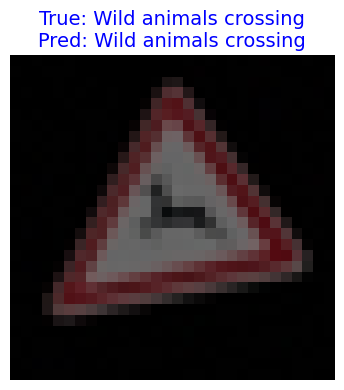

---------------------------------------------



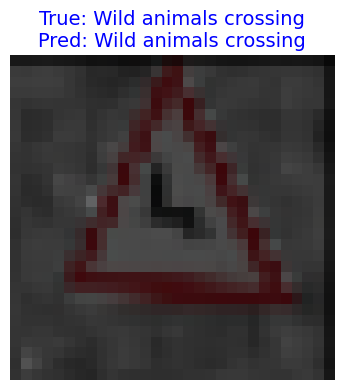

---------------------------------------------



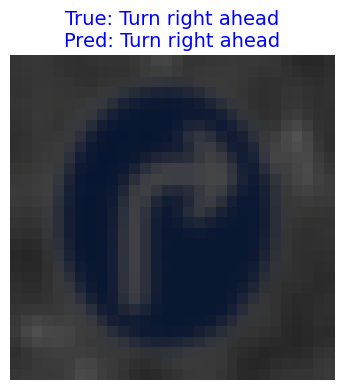

---------------------------------------------



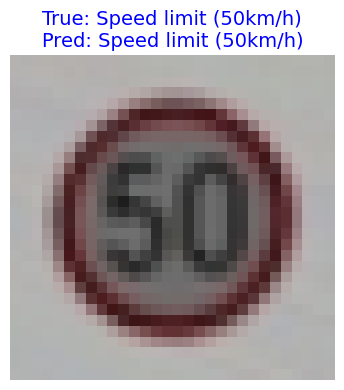

---------------------------------------------



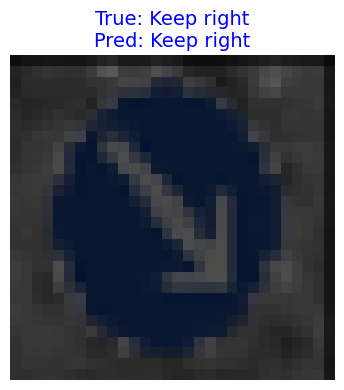

---------------------------------------------



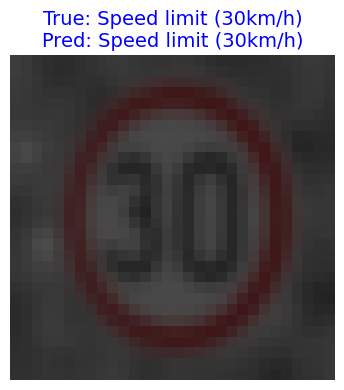

---------------------------------------------



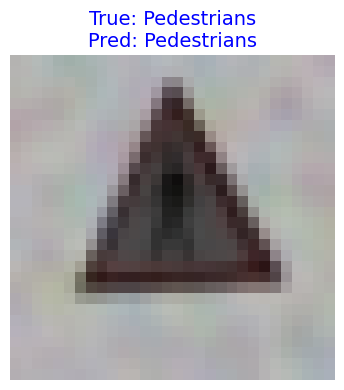

---------------------------------------------



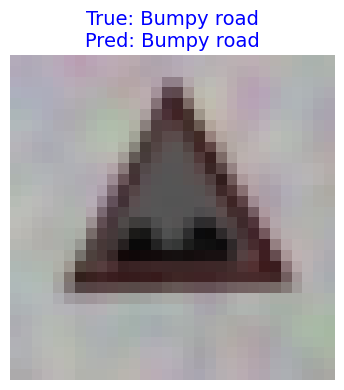

---------------------------------------------



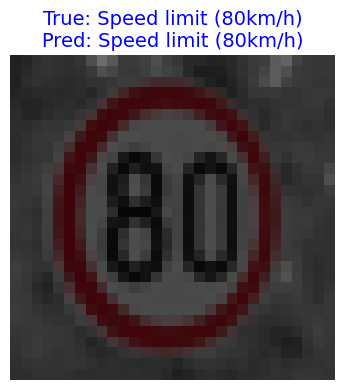

---------------------------------------------



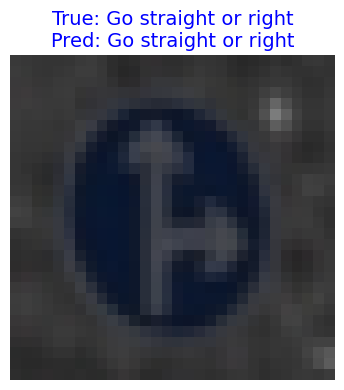

---------------------------------------------



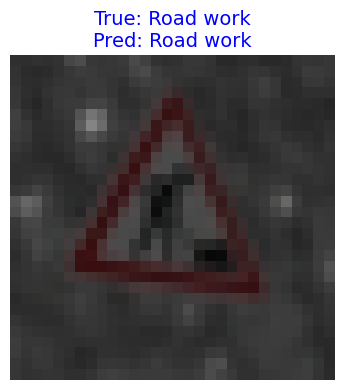

---------------------------------------------



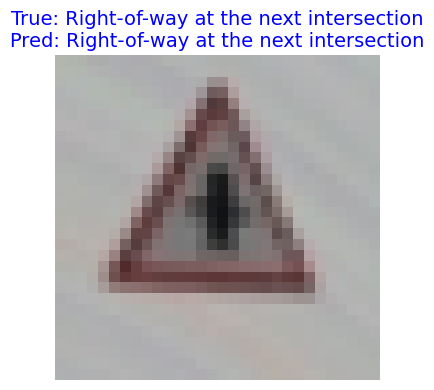

---------------------------------------------



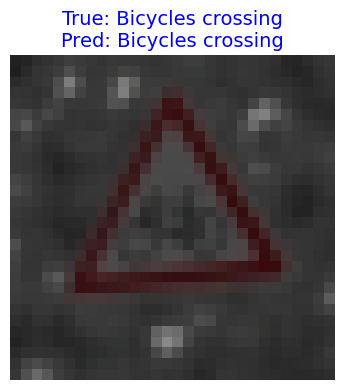

---------------------------------------------



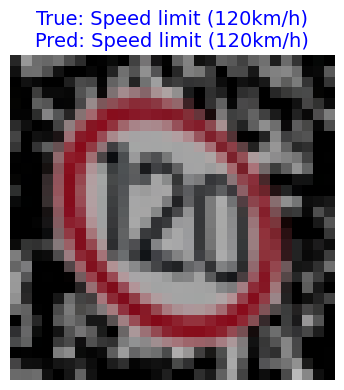

---------------------------------------------



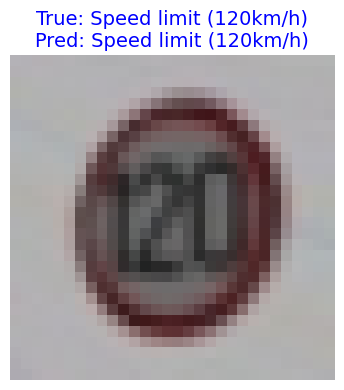

---------------------------------------------



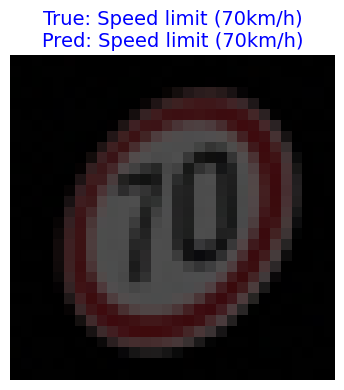

---------------------------------------------



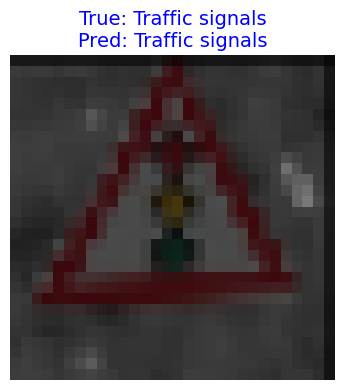

---------------------------------------------



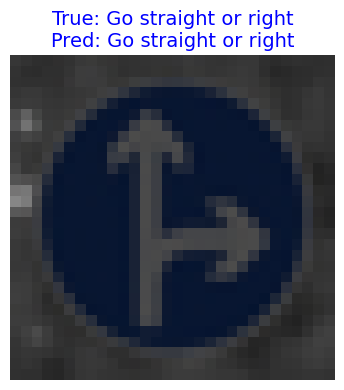

---------------------------------------------



In [19]:
# Number of samples to visualize
num_samples = 20

# Randomly select 20 images from the test set
indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[indices]
true_labels = labels[indices]
predicted_labels = pred[indices]

# Function to display an image with true and predicted labels
def display_image_with_labels(image, true_label, predicted_label):
    plt.figure(figsize=(4, 4))  # Set the figure size for better visibility
    plt.imshow(image.astype('uint8'))  # Display the image
    plt.title(f"True: {class_labels[true_label]}\nPred: {class_labels[predicted_label]}", 
              fontsize=14, color='blue')  # Display class names with a readable font size
    plt.axis('off')  # Remove the axes for a cleaner look
    plt.tight_layout()
    plt.show()

# Display 20 images one by one with true and predicted labels
for i in range(num_samples):
    display_image_with_labels(sample_images[i], true_labels[i], predicted_labels[i])
    print("---------------------------------------------\n")


In [21]:
from sklearn.metrics import classification_report
# Classification report
report = classification_report(labels, pred, target_names=[str(i) for i in range(43) if i not in (6, 16, 24, 30, 32)])

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       216
           2       1.00      1.00      1.00       216
           3       1.00      1.00      1.00       216
           4       1.00      1.00      1.00       216
           5       1.00      1.00      1.00       216
           7       1.00      1.00      1.00       216
           8       1.00      1.00      1.00       216
           9       1.00      1.00      1.00       216
          10       1.00      1.00      1.00       216
          11       1.00      1.00      1.00       216
          12       1.00      1.00      1.00       216
          13       1.00      1.00      1.00       216
          14       1.00      1.00      1.00       216
          15       1.00      1.00      1.00       216
          17       1.00      1.00      1.00       216
          18       1.00      1.00      1.00       216
          19       1.00    